# Matplotlib: data visualization

**Sources**
- Nicolas P. Rougier: http://www.labri.fr/perso/nrougier/teaching/matplotlib
- https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations


## Basic plots

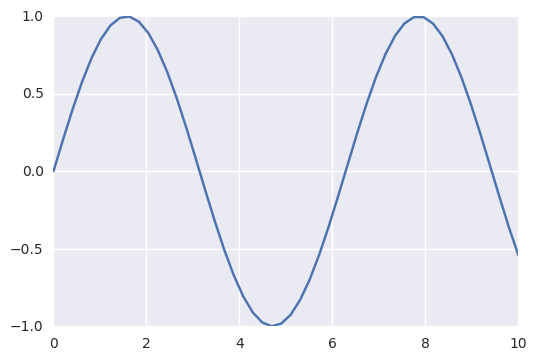

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 10, 50)
sinus = np.sin(x)

plt.plot(x, sinus)
plt.show()

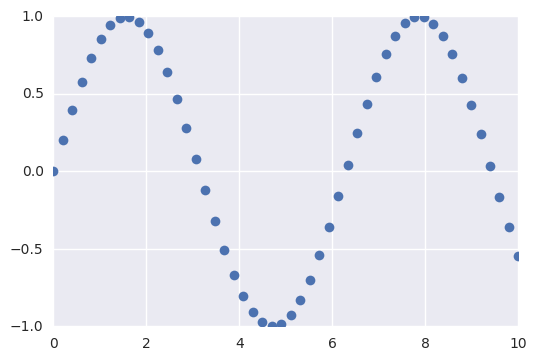

In [41]:
plt.plot(x, sinus, "o")
plt.show()
# use plt.plot to get color / marker abbreviations

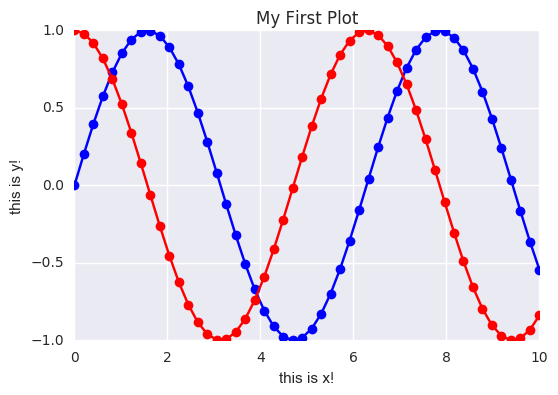

In [42]:
# Rapid multiplot

cosinus = np.cos(x)
plt.plot(x, sinus, "-b", x, sinus, "ob", x, cosinus, "-r", x, cosinus, "or")
plt.xlabel('this is x!')
plt.ylabel('this is y!')
plt.title('My First Plot')
plt.show()

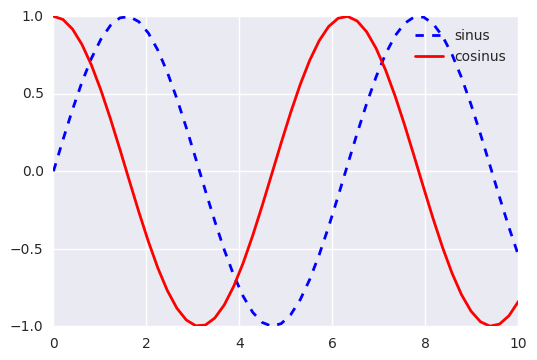

In [43]:
# Step by step
plt.plot(x, sinus, label='sinus', color='blue', linestyle='--', linewidth=2)
plt.plot(x, cosinus, label='cosinus', color='red', linestyle='-', linewidth=2)
plt.legend()
plt.show()

## Scatter (2D) plots

Load dataset

In [44]:
import pandas as pd
try:
    salary = pd.read_csv("../data/salary_table.csv")
except:
    url = 'https://raw.github.com/duchesnay/pylearn-doc/master/data/salary_table.csv'
    salary = pd.read_csv(url)

df = salary

### Simple scatter with colors

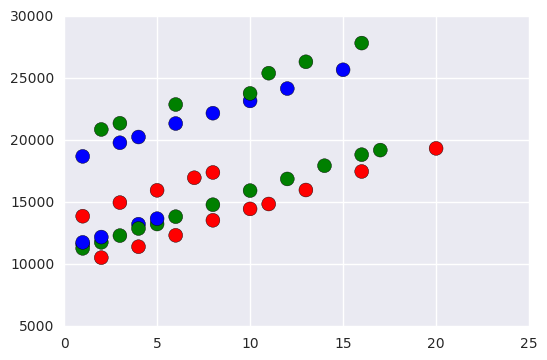

In [45]:
colors = colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}
plt.scatter(df['experience'], df['salary'], c=df['education'].apply(lambda x: colors[x]), s=100)

### Scatter plot with colors and symbols

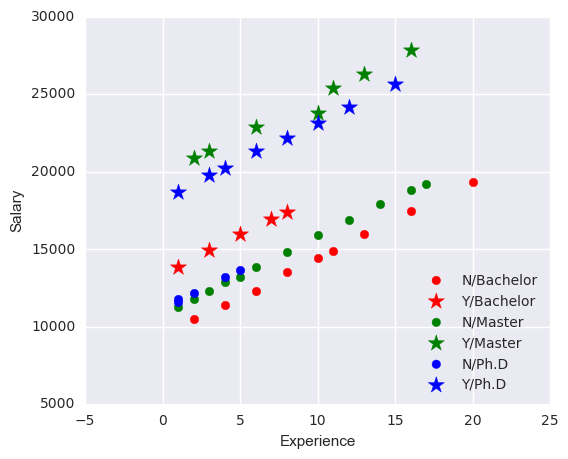

In [46]:
## Figure size
plt.figure(figsize=(6,5))

## Define colors / sumbols manually
symbols_manag = dict(Y='*', N='.')
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}

## group by education x management => 6 groups
for values, d in salary.groupby(['education','management']):
    edu, manager = values
    plt.scatter(d['experience'], d['salary'], marker=symbols_manag[manager], color=colors_edu[edu],
               s=150, label=manager+"/"+edu)

## Set labels
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(loc=4)  # lower right
plt.show()

## Saving Figures

In [47]:
### bitmap format
plt.plot(x, sinus)
plt.savefig("sinus.png")
plt.close()

# Prefer vectorial format (SVG: Scalable Vector Graphics) can be edited with 
# Inkscape, Adobe Illustrator, Blender, etc.
plt.plot(x, sinus)
plt.savefig("sinus.svg")
plt.close()

# Or pdf
plt.plot(x, sinus)
plt.savefig("sinus.pdf")
plt.close()

## Exploring data (with seaborn)

**Sources**: http://stanford.edu/~mwaskom/software/seaborn

Install using: `pip install  -U --user seaborn`

### Boxplot

Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.

![title](images/boxplot.png)

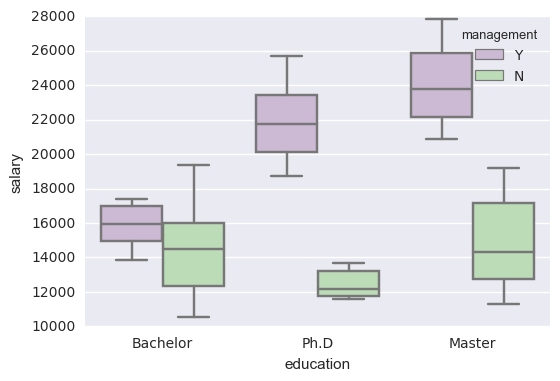

In [48]:
import seaborn as sns

sns.boxplot(x="education", y="salary", hue="management", data=salary, palette="PRGn")

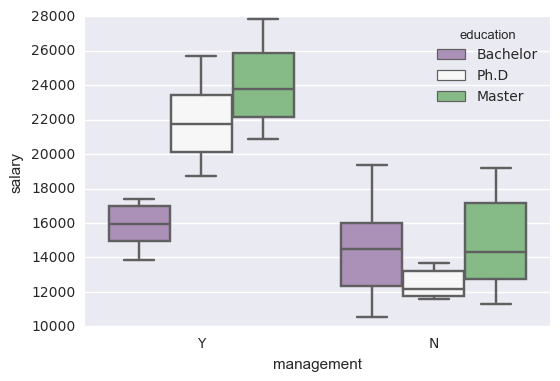

In [49]:
sns.boxplot(x="management", y="salary", hue="education", data=salary, palette="PRGn")

## Density plot with one figure containing multiple axis

One figure can contain several axis, whose contain the graphic elements

/usr/local/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


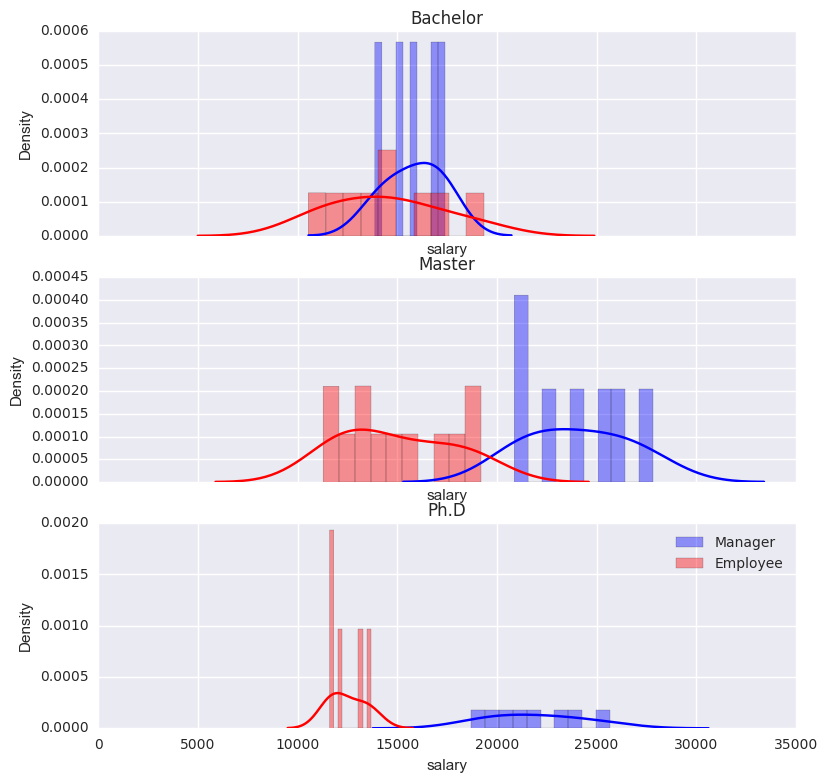

In [50]:
# Set up the matplotlib figure: 3 x 1 axis

f, axes = plt.subplots(3, 1, figsize=(9, 9), sharex=True)

i = 0
for edu, d in salary.groupby(['education']):
    sns.distplot(d.salary[d.management == "Y"], color="b", bins=10, label="Manager", ax=axes[i])
    sns.distplot(d.salary[d.management == "N"], color="r", bins=10, label="Employee", ax=axes[i])
    axes[i].set_title(edu)
    axes[i].set_ylabel('Density')
    i += 1
plt.legend()

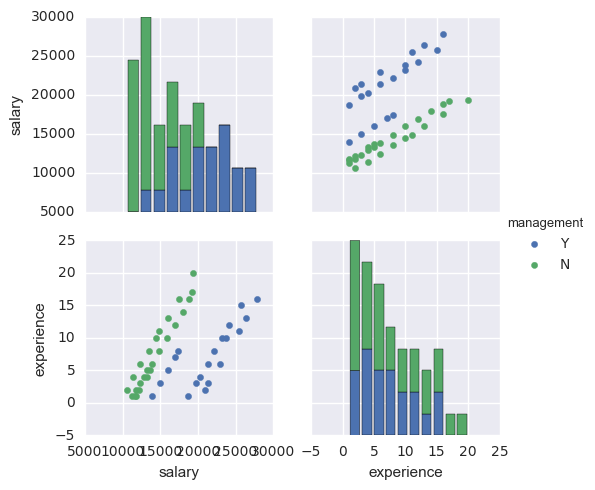

In [51]:
g = sns.PairGrid(salary, hue="management")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()